# Исследование индустрии видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Шаг 1. Откроем файл с данными и изучим общую информацию**

**Шаг 2. Подготовим данные**

**Шаг 3. Проведем исследовательский анализ данных**
- Посмотрим, сколько игр выпускалось в разные годы.
- Посмотрим, как менялись продажи по платформам.
- Определим актуальный период в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Определим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Посмотрим на общее распределение игр по жанрам.

**Шаг 4. Составим портрет пользователя каждого региона**
Определим портрет для пользователя каждого региона (NA, EU, JP) по:
- самые популярные платформы (топ-5). Опишите различия в долях продаж.
- самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверим гипотезы**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Шаг 6. Напишем общий вывод**

Выполним задание в Jupyter Notebook. Заполним программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Применим форматирование и заголовки.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

## Откроем файл с данными и изучим общую информацию

In [2]:
#откроем файл с данными
data = pd.read_csv('/datasets/games.csv')

In [3]:
#выведем общую информацию и размер DataFrame
print('Размер DataFrame:', data.shape)
data.info()

Размер DataFrame: (16715, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#изучим предоставленные данные, ознакомимся с первыми и последними пятью строчками, а также выведем общую информацию по файлу
display(data.head(20), data.tail(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E


In [5]:
#просмотрим количество пропусков в данных по каждому столбцу
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
#определим в процентном соотношении пропущенные данные
for col in data.columns:  
    pct_missing = np.mean(data[col].isna())  
    print('{} - {}%'.format(col, round(pct_missing*100,1))) 

Name - 0.0%
Platform - 0.0%
Year_of_Release - 1.6%
Genre - 0.0%
NA_sales - 0.0%
EU_sales - 0.0%
JP_sales - 0.0%
Other_sales - 0.0%
Critic_Score - 51.3%
User_Score - 40.1%
Rating - 40.5%


In [7]:
#определим по всем данным есть ли дублирующие строчки
data_duplicat = data.duplicated().sum()
print('Дублирующие строки:', data_duplicat)

Дублирующие строки: 0


In [8]:
#выведем типы данных
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [9]:
#выведем название столбцов data
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales',
       'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

### Общий вывод по блоку

**Вывод после вводного ознакомлению с данными:**

- имееться большое количество пропусков в столбцах Critic_Score - 51%, User_Score - 40%, Rating - 40%. 
- дублирующие данные по строкам датасета не встречаются.
- следует привести данные столбца Year_of_Release к правильному типу int и привести названия столбцов к одному регистру.

## Подготовим данные

In [10]:
#видим, что столбцы не соответствуют нормам оформления
#изменим название столбцов, приведем к нижнему регистру
data.columns = data.columns.str.lower()

In [11]:
#рассмотрим пропуски по столбцу name
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
#по пропущенным значениям по столбцу name также отсутствуют значения по столбцам genre, critic_score, user_score, rating
#удалим строчки с пропущенными значениями по столбцу name
data = data.dropna(subset=['name'])

In [13]:
#посмотрим есть ли явные дубликаты по столбцу name
print('Количество явных дубликатов столбца name:', data['name'].duplicated().sum())

Количество явных дубликатов столбца name: 5154


In [14]:
#посмотрим количество дубликатов по каждому наименованию и выведем первые 20 строк
print(data['name'].value_counts().head(20))

Need for Speed: Most Wanted                      12
LEGO Marvel Super Heroes                          9
Ratatouille                                       9
FIFA 14                                           9
Madden NFL 07                                     9
LEGO Harry Potter: Years 5-7                      8
LEGO Star Wars II: The Original Trilogy           8
FIFA Soccer 13                                    8
LEGO The Hobbit                                   8
The LEGO Movie Videogame                          8
LEGO Jurassic World                               8
FIFA 15                                           8
Terraria                                          8
Angry Birds Star Wars                             8
Monopoly                                          8
Lego Batman 3: Beyond Gotham                      8
Cars                                              8
Madden NFL 08                                     8
LEGO Pirates of the Caribbean: The Video Game     7
The Amazing 

In [15]:
#есть дубликаты, возможно название одной и той же игры выпускалась на разных платформах
#посмотрим данные на примере названия игр Need for Speed: Most Wanted и FIFA 14
display(data.query('(name == "Need for Speed: Most Wanted") | (name == "FIFA 14")').sort_values(by='name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
6871,FIFA 14,3DS,2013.0,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4985,FIFA 14,Wii,2013.0,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
7875,FIFA 14,PSP,2013.0,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E
4699,FIFA 14,PSV,2013.0,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013.0,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
6473,Need for Speed: Most Wanted,GBA,2005.0,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E


In [16]:
#рассмотрим столбец platform
#выведем уникальные значения столбца platform для опредедения неявных дубликатов
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [17]:
#рассмотрим пропуски по столбцу year_of_release и выведем 20 первых строчек
display(data[data['year_of_release'].isnull()].head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [18]:
#одни и те же игры выпускают на разных платформах, вот только их реализация не всегда выпадает в один и тот же год
#также бывают игры переиздания
#заполним пропущенные значения в столбце year_of_release - 0, как неизвестная дата релиза
data['year_of_release'] = data['year_of_release'].fillna(0)

In [19]:
data['year_of_release'].sort_values().unique()

array([   0., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016.])

In [20]:
#рассмотрим столбцы na_sales, eu_sales, jp_sales, other_sales
#общие показатели по столбцам
display(data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe())

,na_sales,eu_sales,jp_sales,other_sales
count,16713.000000,16713.000000,16713.000000,16713.000000
mean,0.263302,0.145045,0.077625,0.047343
std,0.813565,0.503359,0.308871,0.186742
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


In [21]:
#рассмотрим пропуски по столбцу critic_score
display(data[data['critic_score'].isnull()].head(20))
data['critic_score'].sort_values().unique()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [22]:
#рассмотрим пропуски по столбцу user_score
display(data[data['user_score'].isnull()].head(20))
data['user_score'].sort_values().unique()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [23]:
#в уникальных значениях столбца user_score встречается оценка 'tbd'
#выведем несколько строчек с данной оценкой
display(data.query('user_score == "tbd"').head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [24]:
#в игровой индустрии чаще всего аббревеатура 'tbd' означает - будет определенно позже или еще не определено
#следует заменить 'tbd' на пропущенные значения
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [25]:
#рассмотрим пропуски по столбцу rating и выведем 20 первых строчек
display(data[data['rating'].isnull()].head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [26]:
#рассмотрим уникальные значения столбца rating
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [27]:
#заполним пропущенные значения в столбце rating на indefinite
data['rating'] = data['rating'].fillna('indefinite')

In [28]:
#приведем данные к правильному типу
data = data.fillna({'year_of_release': 0})\
                    .astype({'year_of_release': 'int64', 'user_score': 'float64'})
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [29]:
#посчитаем общее количество игр проданных по всем регионам 
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,indefinite,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,indefinite,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,indefinite,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,indefinite,0.01


### Общий вывод по блоку

**Вывод**

При предобработке данных были изменены типы данных столбцов: year_of_release (год релиза) с типа float64 на тип int64, так как гор реализации не может быть вещественным числом, а также user_score (оценка пользователей) с типа object на тип float64, так как оценка это числовая величина. Заполнили пропущенные значения:

столбец year_of_release заполнили пропущенные значения 0, как неопределенные года.

Пропущенные значения в столбце critic_score и user_score не стал заполнять какими либо значениями, так как эти данные зависят от оценки специалистов и мнения большого круга пользователей. Сфера видео игр относительно молодая и возможно раньше не была столь развита, как на текущий момент. Многие пользователи и критики не особо оценивали саму игру так как видео игры были чем то новым и захватывающим, а также не было такого разнообразия для оценки определенной игры, да и возможно не было таких ресурсов где можно было поделиться впечатлениями и оценочным мнением. Также возможно есть игры которые только были анонсированны, но пока не были выпущены и соотвественно не были оценены.

В столбце rating оставил пропуски, так как данный столбец показывает возрастной рейтинг для компьютерных игр, а компания Entertainment Software Rating Board (ESRB) занимающаяся данной оценкой была основана в 1994, скорее всего для игр вышедших до этого момента не был определен возрастной рейтинг. 

Также пропуски во всех вышеперечисленных столбцах могли возникнуть в следствии незначительности, малоизвестности игры, возможно данная игра известна только в определенных странах и только на каких либо малопользовательских платформах

## Проведем исследовательский анализ данных

### Количесвто игр выпускаемых в разные годы

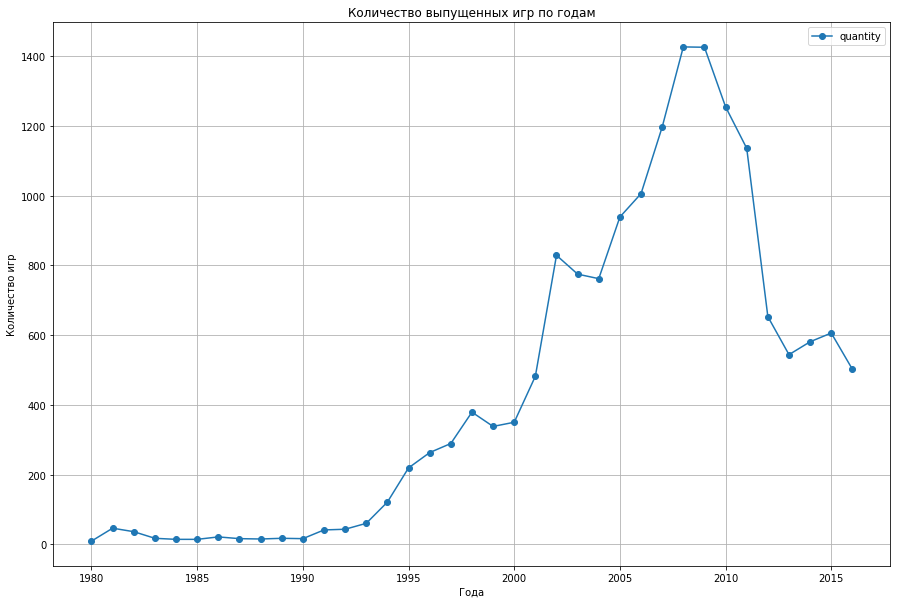

In [30]:
#посмотрим сколько игр выпускалось в разные годы
#создадим новую переменную количество игр в год, сгруппируем по годам и найдем количество игр
games_per_year = data.query('year_of_release != 0').groupby('year_of_release').agg({'year_of_release': 'count'})
games_per_year = games_per_year.rename(columns={'year_of_release': 'quantity'})
#построим график
games_per_year.plot(style='o-', grid=True, figsize=(15, 10))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Года')
plt.ylabel('Количество игр')
plt.show()

По данному графику можно выделить 3 разных периода развития сферы видеоигр:
- первый период с 1980 по 1993 года - становление и формирование сферы видео игр;
- второй период приходится с 1994 по 2009 - активное развитие сферы видео игр и достижение пика по выпуску разных видео игр;
- третий период с 2010 - заметны снижение по выпуску видео игр, период упадка выпуска видео игр.

### Распределнение продаж игр  в разные годы по платформам

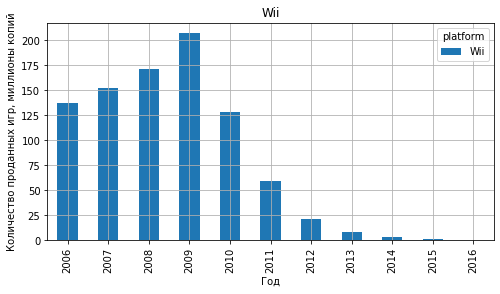

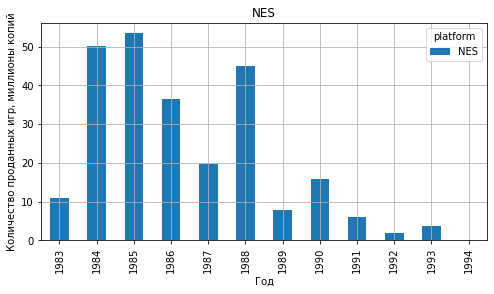

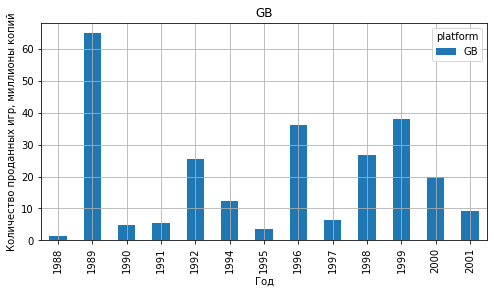

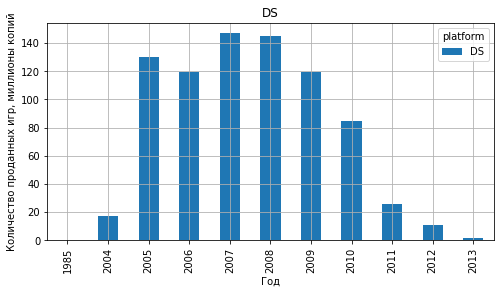

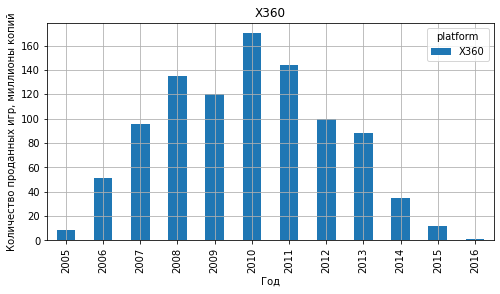

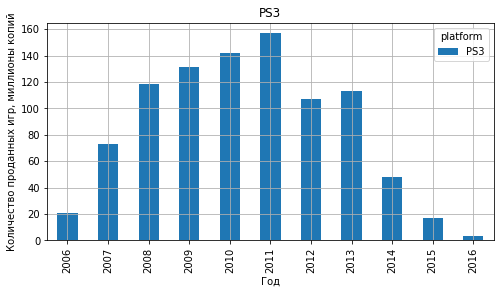

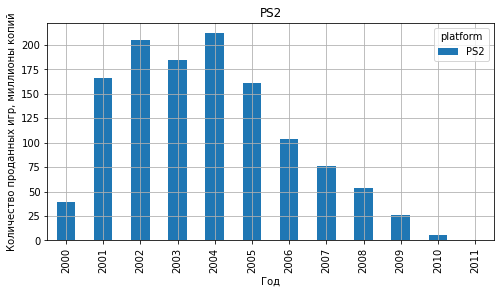

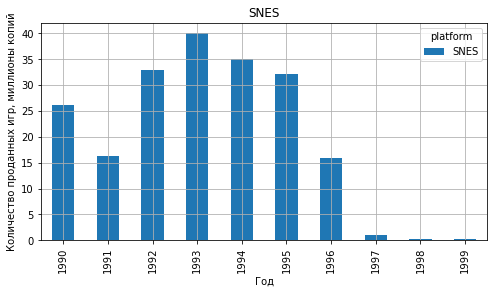

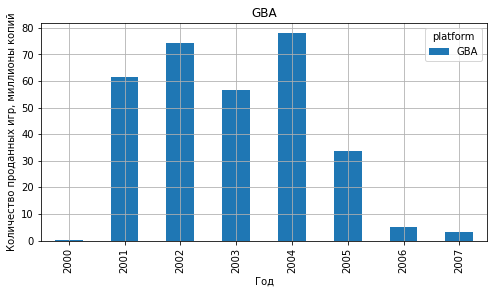

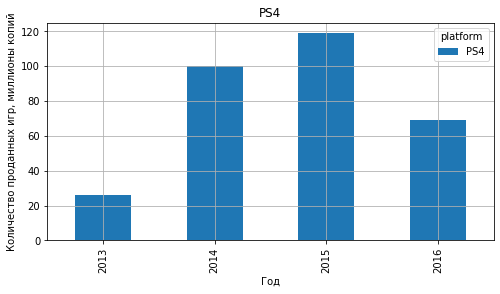

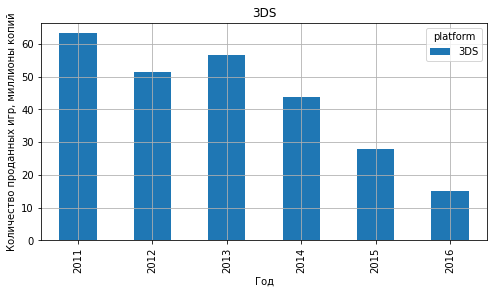

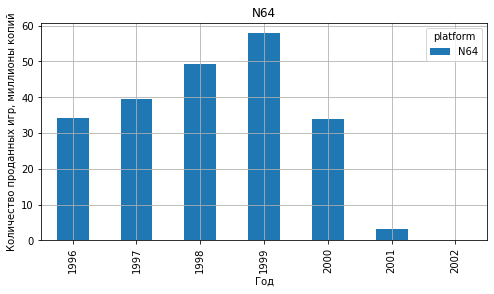

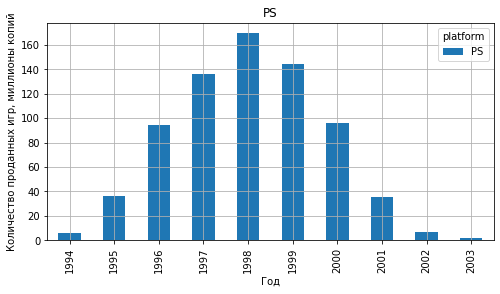

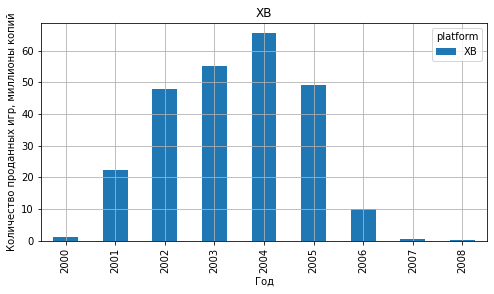

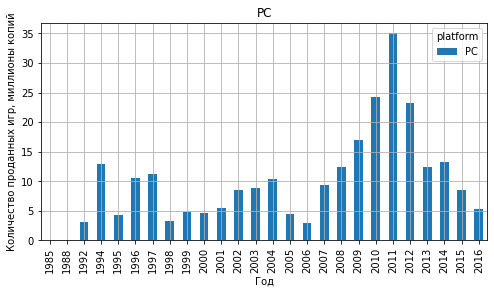

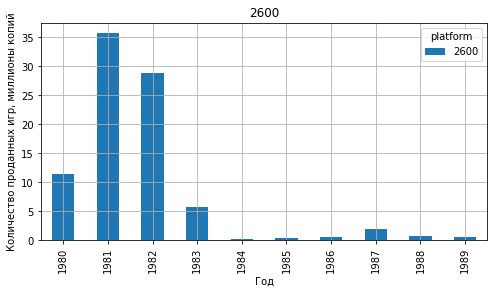

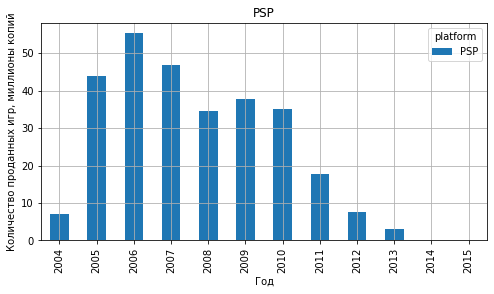

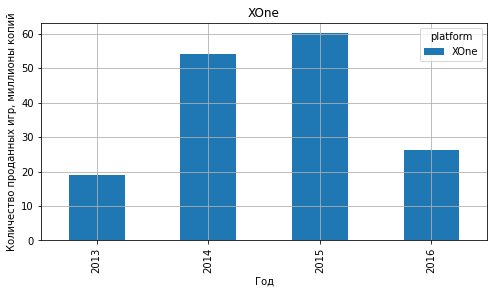

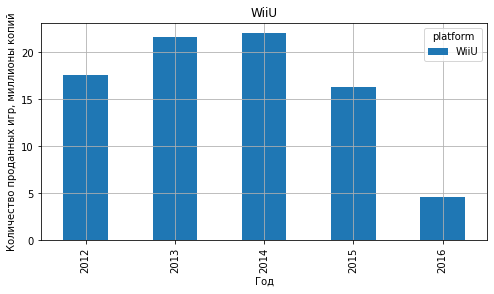

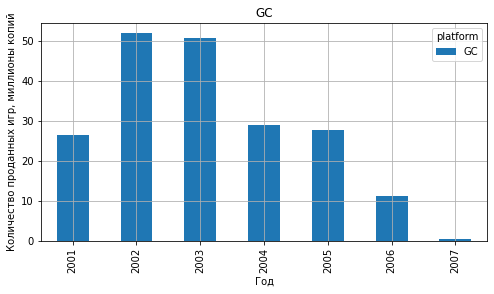

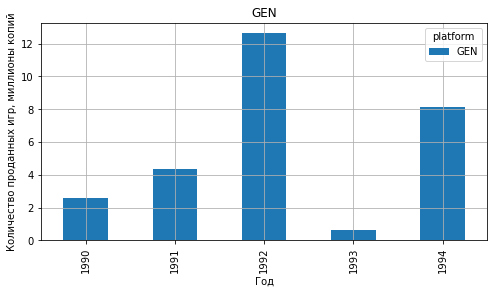

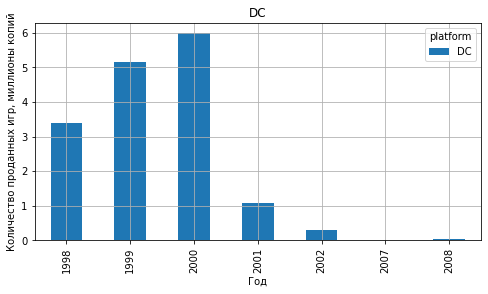

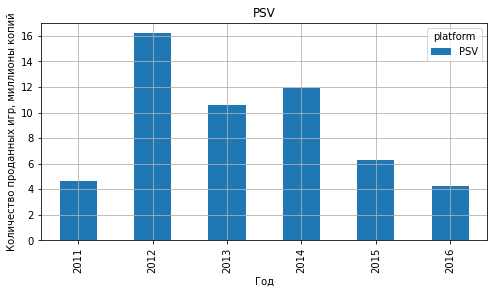

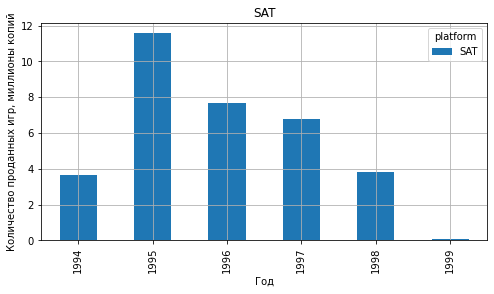

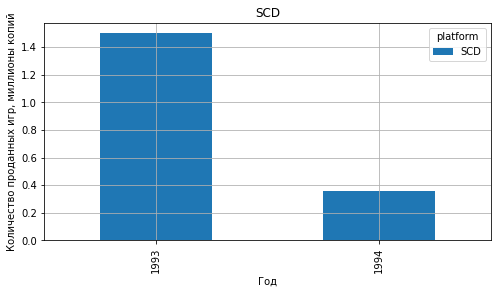

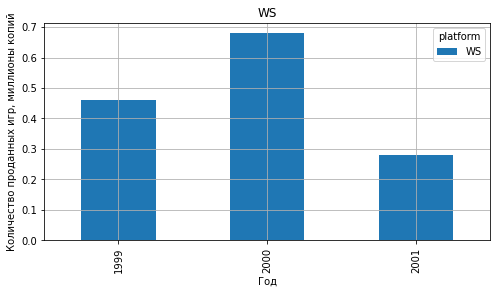

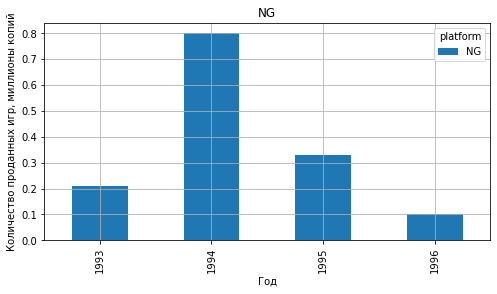

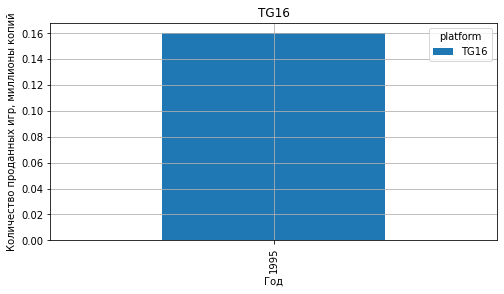

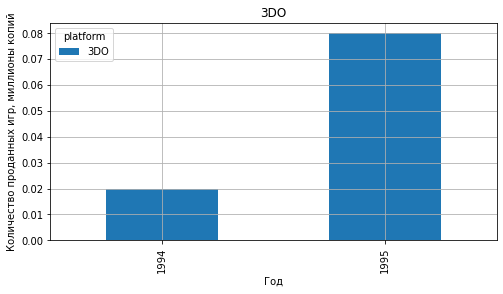

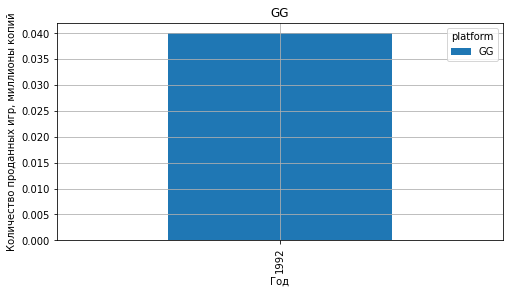

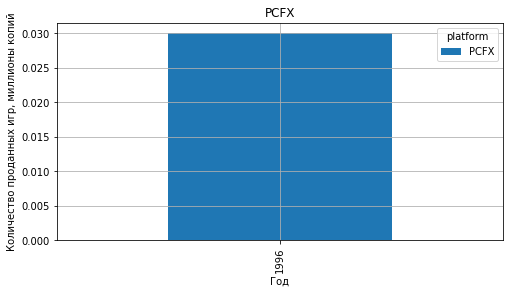

In [31]:
#посмотрим как менялись продажи игр по платформам в разные годы
unique_names_platform = data['platform'].unique()
for form in unique_names_platform:
    all_sales_for_platform = data.query('(platform == @form) & (year_of_release != 0)')\
                .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
    all_sales_for_platform.plot(figsize=(8, 4), kind='bar', grid=True)
    plt.title(form)
    plt.xlabel('Год')
    plt.ylabel('Количество проданных игр, миллионы копий')
    plt.show()

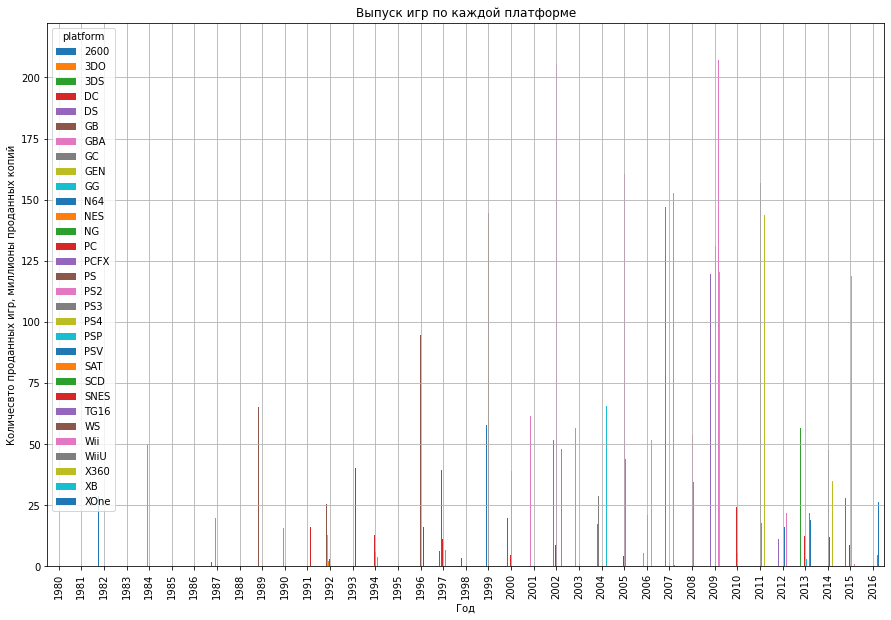

In [32]:
#вывод всех проданных игр по определенным платформам за все время
platforming_game_per_year = data.query('year_of_release != 0')\
                                .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
platforming_game_per_year.plot(kind='bar', grid=True, figsize=(15, 10))
plt.title('Выпуск игр по каждой платформе')
plt.xlabel('Год')
plt.ylabel('Количесвто проданных игр, миллионы проданных копий')
plt.show()

### Лидеры по продажам

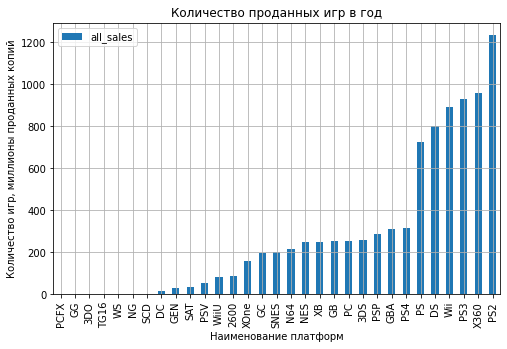

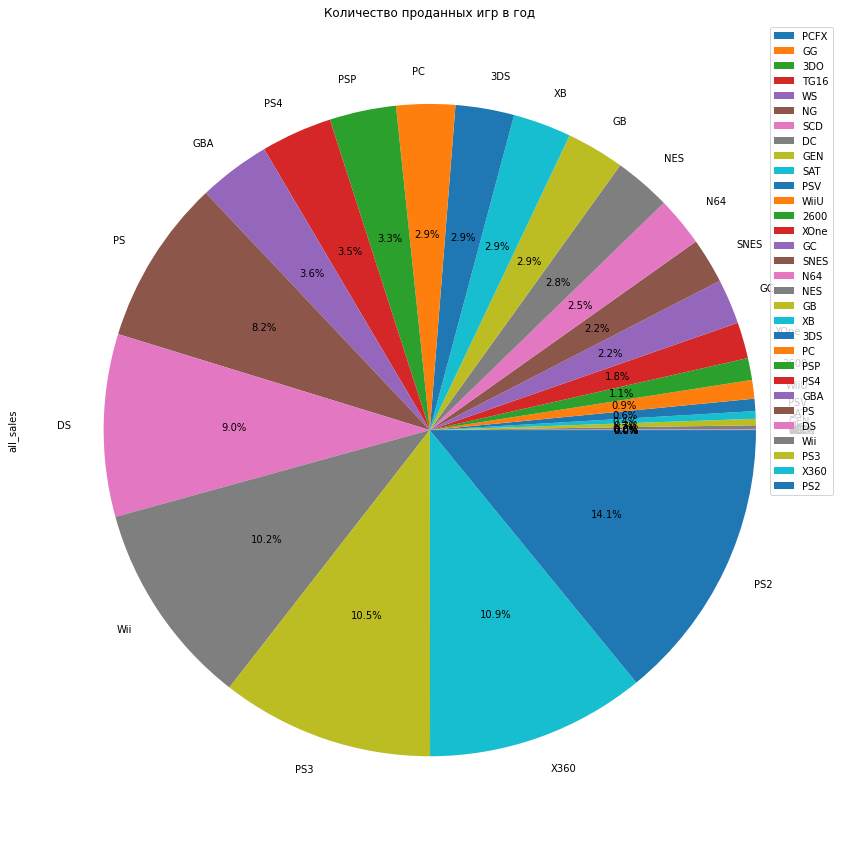

In [33]:
#определим проданные игры по каждой платформе за все время
all_sales_games_platform = data.query('year_of_release != 0')\
                                .groupby('platform').agg({'all_sales': 'sum'})\
                                .sort_values('all_sales', ascending=True)
all_sales_games_platform.plot(kind='bar', grid=True, figsize=(8, 5))
plt.title('Количество проданных игр в год')
plt.xlabel('Наименование платформ')
plt.ylabel('Количество игр, миллионы проданных копий')
plt.show()
all_sales_games_platform = data.groupby('platform').agg({'all_sales': 'sum'}).sort_values(by='all_sales')
all_sales_games_platform.plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(15, 15))
plt.title('Количество проданных игр в год')
plt.show()

По данным графикам можно выделить 6 платформ являющиемся лидерами по количеству проданных копий в сумме дающих более 50% от общей массы проданных игр представленных в данных. Более 600 миллионов копий игр были приобретены на такие игровые платформы как: PS2, X360, PS3, Wii, DS, PS. Другие же платформы не достигли планки продаж на свои платформы и до 400 миллионов экземпляров. Возможно данные платформы приходятся на первый период развития игровой индустрии, период формирования, или же наоборот новые платформы которые только "вышли в свет".

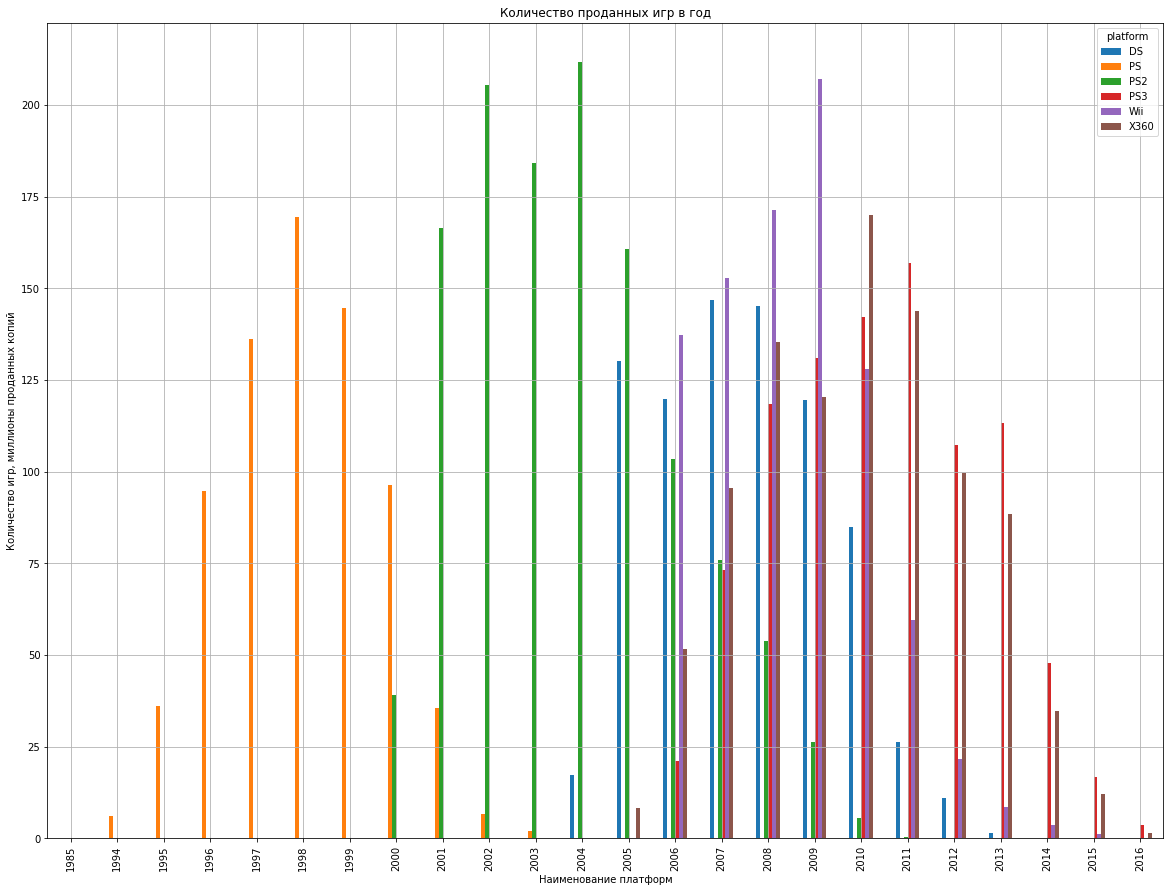

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


In [34]:
#выделим платформы с наибольшими суммарными продажами
top_platform_names_by_sales= ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top_sales_platforms = data.query('(year_of_release != 0) & (platform in @top_platform_names_by_sales)')\
                            .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')

#постоим график распределения по годам
top_sales_platforms.plot(kind='bar', grid=True, figsize=(20, 15))
plt.title('Количество проданных игр в год')
plt.xlabel('Наименование платформ')
plt.ylabel('Количество игр, миллионы проданных копий')
plt.show()
display(top_sales_platforms)

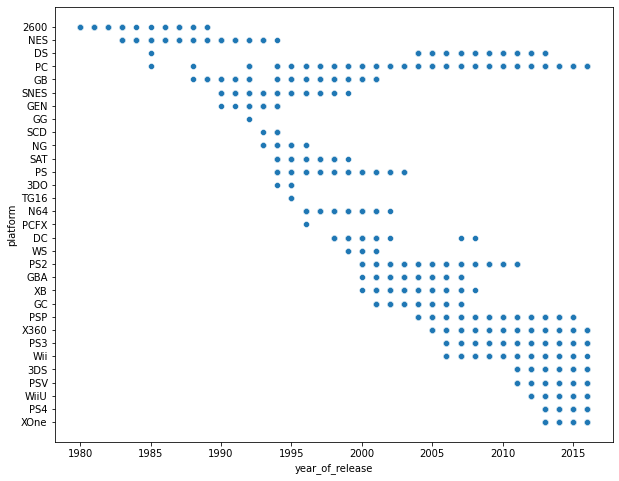

In [35]:
#построим график по выходу игр на разных платформах по годам для определения характерного срока старения платформ и появление новых
platform_life_matrix = data.query('year_of_release != 0').sort_values(by='year_of_release')
plt.figure(figsize=(10, 8))
sns.scatterplot(x='year_of_release', y='platform', data=platform_life_matrix)
plt.show()

Судя по данным графикам можно утверждать, что характерный срок старения и появления новых платформ составляет около 10 лет. Особенно явно видно развитие от стадии развития/создания платформы до ее старения на графике распределения платформ с лидирующей суммой продаж за все время.

Можно выделить основные платформы в разные периоды:
- 'долгожители' первого периода развития и становления видео игр с 1980 по 1994 года, являются такие платформы как: 2600, NES, GB;
- в период активного развития сферы видео игр в период с 1995 по 2009: NG, SAT, PS, N64, DC, PS2;
- третий период с 2009 года: PC, DS, PSP, X360, PS3, Wii, 3DS, PSV, WiiU, PS4, XOne.

Исходя из проведенных исследований и активном развитии сферы видеоигр, для составления погноза на последующий период следует брать 'живые' платформы и учитывать актуальный период последние 3 года, но так как данные за 2016 год неполные, возьмем период последние 4 года.

### Оценка платформ на актуальный период

In [36]:
#проведем срез по актуальным данным
actual_platform = ['PC', 'X360', 'PS3', 'Wii', '3DS', 'PSV', 'WiiU', 'PS4', 'XOne']
current_data = data.query('(year_of_release > 2012) & (platform in @actual_platform)')
display(current_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,indefinite,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,indefinite,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01


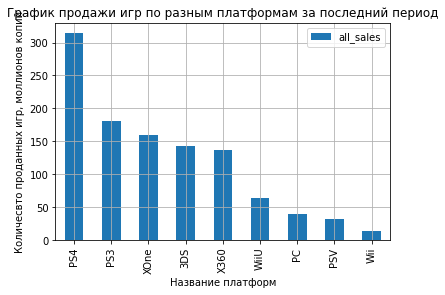

In [37]:
#из выбранных данных определим общий спрос (количество проданных копий) по платформам
current_data.groupby('platform').agg({'all_sales': 'sum'})\
                                .sort_values(by='all_sales', ascending=False)\
                                .plot(kind='bar', grid=True)
plt.title('График продажи игр по разным платформам за последний период')
plt.xlabel('Название платформ')
plt.ylabel('Количесвто проданных игр, моллионов копий')
plt.show()

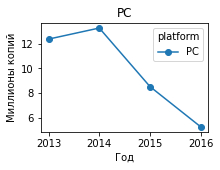

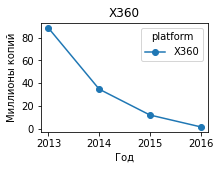

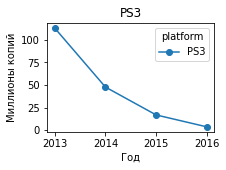

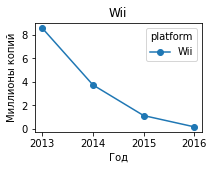

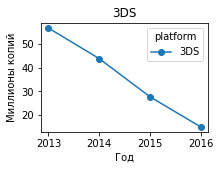

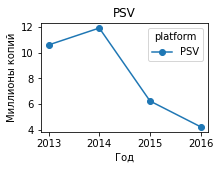

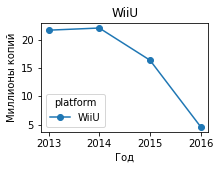

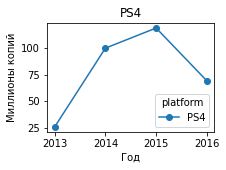

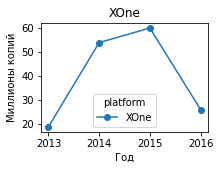

In [38]:
#посмотрим как менялись продажи игр по платформам в разные годы по актуальным данным
for form in actual_platform:
    current_data.query('platform == @form')\
                .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')\
                .plot(style='o-', figsize=(3, 2))
    plt.title(form)
    plt.xlabel('Год')
    plt.ylabel('Миллионы копий')
    plt.show()

Из всех актуальных платформ можно выделить лидеров продаж, такие как: PS4, PS3, XOne, 3DS, X360. 

Однако по графикам видно, что у таких платформ как PC, X360, PS3, Wii, 3DS, PSV, WiiU наблюдается общее снижение тенденций продаж, то есть продажи игр данных платформ - падают. И наоборот, у таких платформ как PS4, XOne частично наблюдаются росты в продажах, возможно это связанно с тем, что это молодые платформы.

Из всех платформ потенциально прибыльными являются молодые платформы, такие как: PS4, XOne - с растущим спросом на игры данных платформ.

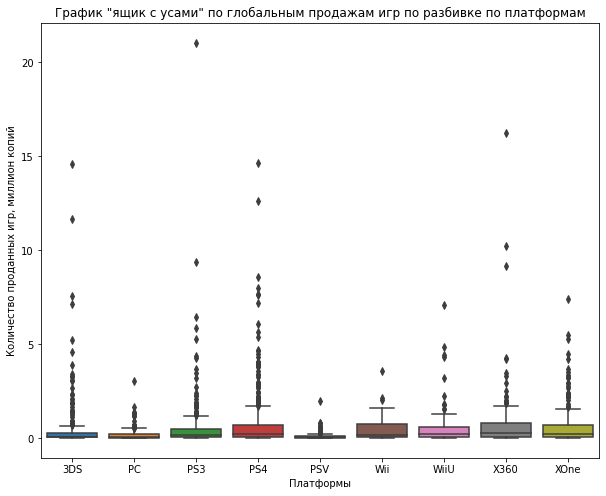

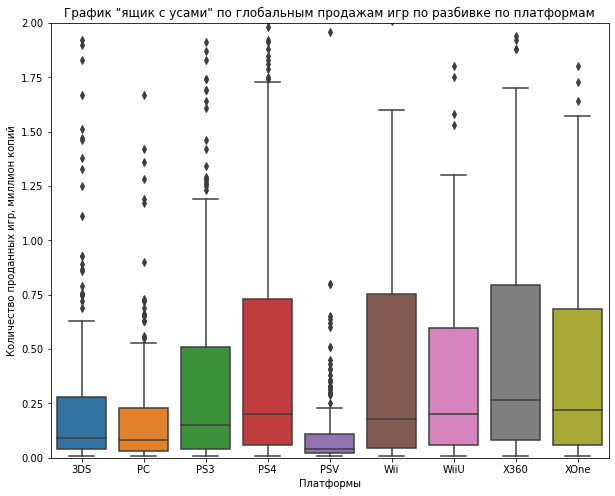

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
X360,186.0,0.735484,1.663275,0.01,0.080,0.265,0.795,16.27
XOne,247.0,0.645020,1.036139,0.01,0.060,0.220,0.685,7.39
PS4,392.0,0.801378,1.609456,0.01,0.060,0.200,0.730,14.63
WiiU,115.0,0.562000,1.038778,0.01,0.060,0.200,0.595,7.09
Wii,23.0,0.593913,0.915432,0.01,0.045,0.180,0.755,3.58
PS3,345.0,0.525884,1.451939,0.01,0.040,0.150,0.510,21.05
3DS,303.0,0.472772,1.381347,0.01,0.040,0.090,0.280,14.60
PC,189.0,0.208624,0.352304,0.01,0.030,0.080,0.230,3.05
PSV,358.0,0.092151,0.153816,0.01,0.020,0.040,0.110,1.96


In [39]:
#построим график 'ящик с усами' по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(10, 8))
sns.boxplot(x='platform', y='all_sales', data=current_data.sort_values(by='platform'))
plt.title('График "ящик с усами" по глобальным продажам игр по разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество проданных игр, миллион копий')
plt.show()
plt.figure(figsize=(10, 8))
sns.boxplot(x='platform', y='all_sales', data=current_data.sort_values(by='platform'))
plt.title('График "ящик с усами" по глобальным продажам игр по разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество проданных игр, миллион копий')
plt.ylim(0, 2)
plt.show()

#выведем значения
median_all_sales = current_data.groupby('platform')['all_sales']\
                               .describe().sort_values(by='50%', ascending=False)
display(median_all_sales)

По выведенным графикам можно сказать, что среди платформ самый лучший показатель стабильности и объема продаж игр показывает платформа PS4, X360, XOne, WiiU. 

Показатели таких платформ как Wii, PS3 - являются средними. 

Показатели платформ 3DS, PC- ниже среднего. 

Показатель объема продаж такой платформы как PSV - являются слабым.

### Влияние оценки критиков и пользователей

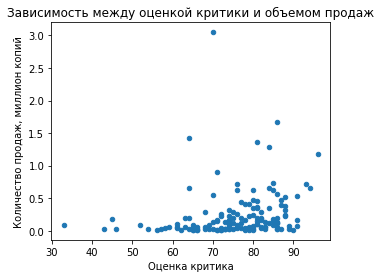

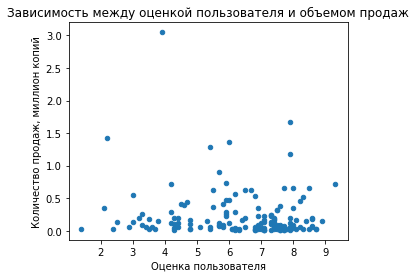

Корреляция оценки критиков и объема продаж по платформе PC: 0.19412407903472956 Взяимосвязи совсем нет или почти нет
Корреляция оценки пользователей и объема продаж по платформе PC: -0.10923502736171779 Взяимосвязи совсем нет или почти нет


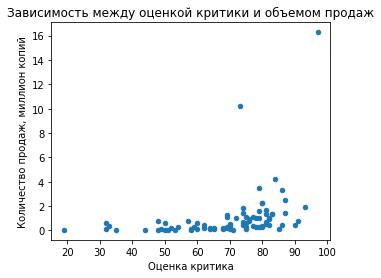

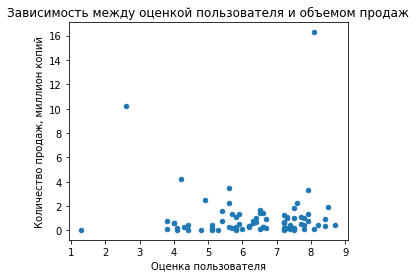

Корреляция оценки критиков и объема продаж по платформе X360: 0.3503445460228664 Слабая взяимосвязь
Корреляция оценки пользователей и объема продаж по платформе X360: -0.006238179532306317 Взяимосвязи совсем нет или почти нет


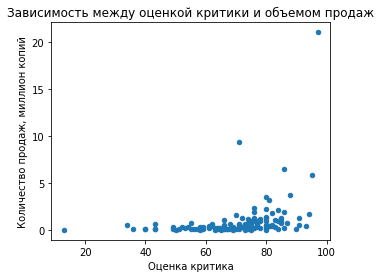

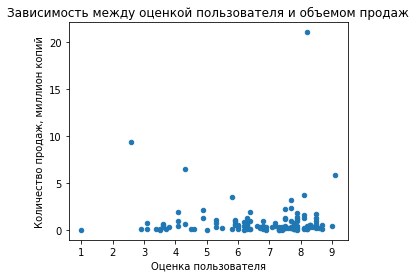

Корреляция оценки критиков и объема продаж по платформе PS3: 0.33380663565061736 Слабая взяимосвязь
Корреляция оценки пользователей и объема продаж по платформе PS3: 0.02269094327112414 Взяимосвязи совсем нет или почти нет


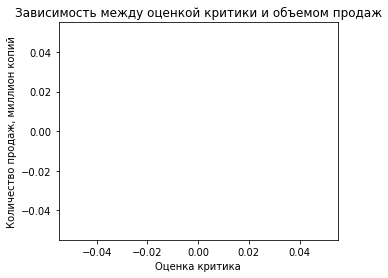

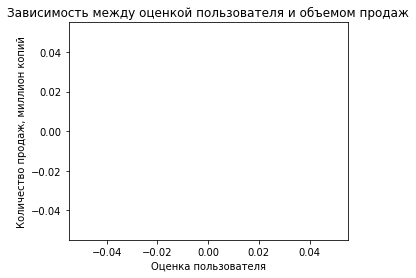

Корреляция оценки критиков и объема продаж по платформе Wii: nan None
Корреляция оценки пользователей и объема продаж по платформе Wii: nan None


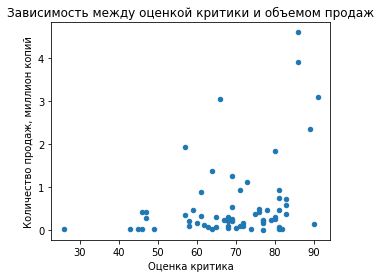

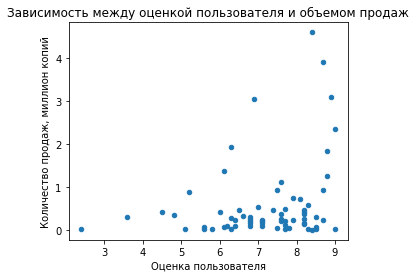

Корреляция оценки критиков и объема продаж по платформе 3DS: 0.3392349287853147 Слабая взяимосвязь
Корреляция оценки пользователей и объема продаж по платформе 3DS: 0.2729904366942444 Слабая взяимосвязь


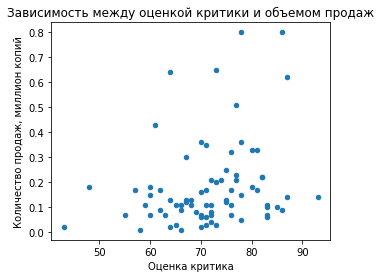

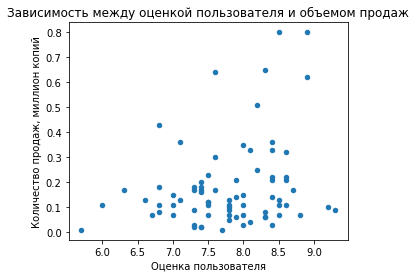

Корреляция оценки критиков и объема продаж по платформе PSV: 0.2540997021864078 Слабая взяимосвязь
Корреляция оценки пользователей и объема продаж по платформе PSV: 0.2654782720509426 Слабая взяимосвязь


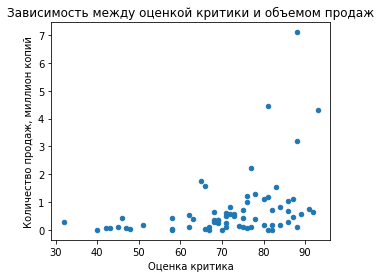

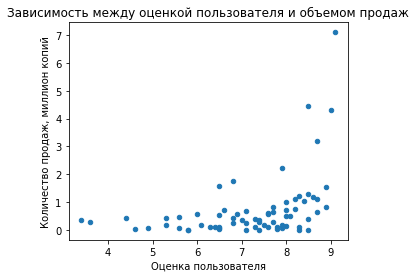

Корреляция оценки критиков и объема продаж по платформе WiiU: 0.37950449899784144 Слабая взяимосвязь
Корреляция оценки пользователей и объема продаж по платформе WiiU: 0.40869174384926477 Средняя взяимосвязь


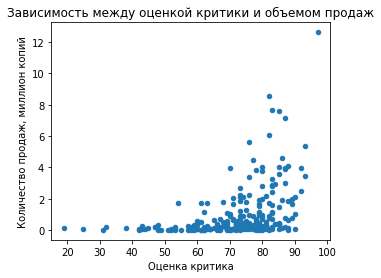

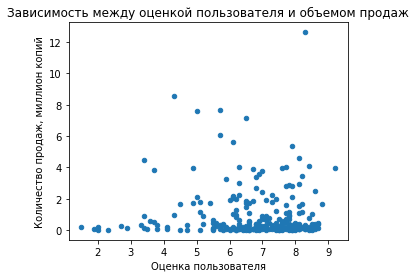

Корреляция оценки критиков и объема продаж по платформе PS4: 0.40589480145836687 Средняя взяимосвязь
Корреляция оценки пользователей и объема продаж по платформе PS4: -0.03362497596528878 Взяимосвязи совсем нет или почти нет


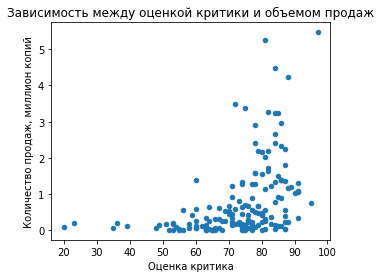

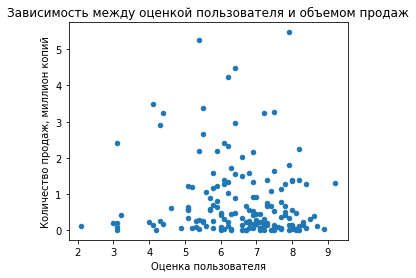

Корреляция оценки критиков и объема продаж по платформе XOne: 0.41042203561296375 Средняя взяимосвязь
Корреляция оценки пользователей и объема продаж по платформе XOne: -0.09400318326920852 Взяимосвязи совсем нет или почти нет


In [40]:
#создадим функцию для оценки влияния по corr
def corr_score(score):
    if abs(score) < 0.2:
        return 'Взяимосвязи совсем нет или почти нет'
    elif 0.2 <= abs(score) < 0.4:
        return 'Слабая взяимосвязь'
    elif 0.4 <= abs(score) < 0.6:
        return 'Средняя взяимосвязь'
    elif 0.6 <= abs(score) < 0.8:
        return 'Сильная взяимосвязь'
    elif 0.8 <= abs(score) <= 1:
        return 'Прямая или почти прямая взяимосвязь'
    
#посмотрим, как влияют на продажи отзывы пользователей и критиков
for name_platform in actual_platform:
    current_data_corr = current_data.query('platform == @name_platform')\
                                    .dropna(subset=['critic_score', 'user_score'])
    current_data_corr.plot(x='critic_score', y='all_sales', kind='scatter', figsize=(5, 4))
    plt.title('Зависимость между оценкой критики и объемом продаж')
    plt.xlabel('Оценка критика')
    plt.ylabel('Количество продаж, миллион копий')
    plt.show()
    current_data_corr.plot(x='user_score', y='all_sales', kind='scatter', figsize=(5, 4))
    plt.title('Зависимость между оценкой пользователя и объемом продаж')
    plt.xlabel('Оценка пользователя')
    plt.ylabel('Количество продаж, миллион копий')
    plt.show()
    print(f'Корреляция оценки критиков и объема продаж по платформе {name_platform}:'\
          , current_data_corr['critic_score'].corr(current_data_corr['all_sales'])\
          , corr_score(current_data_corr['critic_score'].corr(current_data_corr['all_sales'])))
    
    print(f'Корреляция оценки пользователей и объема продаж по платформе {name_platform}:'\
          , current_data_corr['user_score'].corr(current_data_corr['all_sales'])\
          , corr_score(current_data_corr['user_score'].corr(current_data_corr['all_sales'])))

Затруднительно произвести влияние оценки критиков и пользователей по платформе Wii, много пропусков по столбцам user_score и critic_score.

В общем исходя из диаграмм рассеивания и коэфициента корреляции можно заметить не прямое, но умеренное влияние оценки пользователей и критиков на объем продаж. 
Зависимость оценки критиков и количеством продаж проследуется почти на всех платформах, а вот влияние оценки пользователей не всегда учитывается.

Среди всех рассматриваемых платформ можно выделить WiiU. По данной платформе проследуется зависимость и критиков и пользователей по отношению к количеству продаж данной платформы.
Также можно выделить платформы где оценка критика в средней степени влияет на объем продаж, такими платформами являются: PS4, XOne.

Можно сказть, что в большей степени объем продаж не так сильно зависит от оценки, что критиков, что пользователей.

### Распределение игр по жанрам

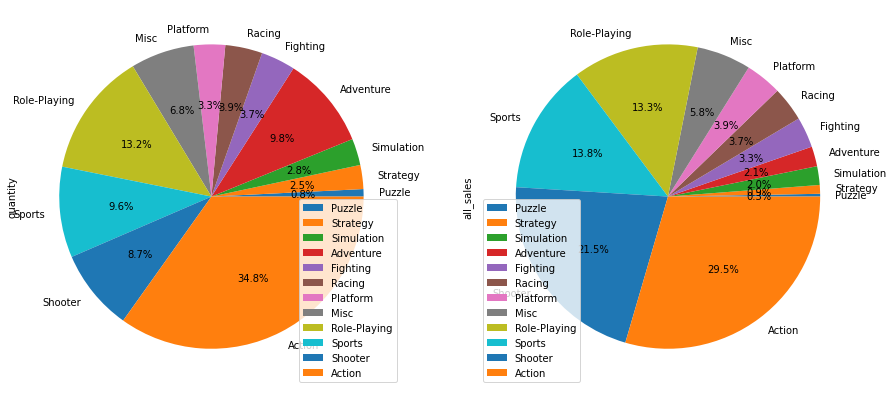

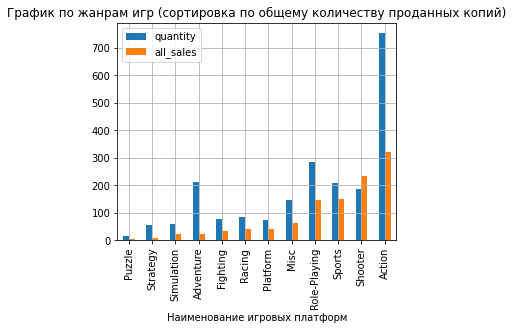

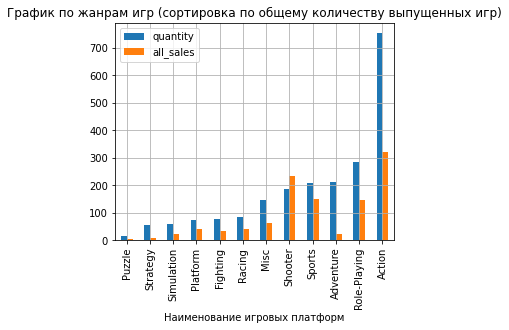

In [41]:
#посмотрим на общее распределение игр по жанрам, а также общее количесвто проданных копий игр по разным жанрам
current_data_genre = current_data.groupby('genre').agg({'name': 'count', 'all_sales': 'sum'}).sort_values(by='all_sales')
current_data_genre = current_data_genre.rename(columns={'name': 'quantity'})
current_data_genre.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(15, 15))
plt.show()
current_data_genre.plot(kind='bar', grid=True, figsize=(5, 4))
plt.title('График по жанрам игр (сортировка по общему количеству проданных копий)')
plt.xlabel('Наименование игровых платформ')
plt.show()
current_data_genre.sort_values(by='quantity').plot(kind='bar', grid=True, figsize=(5, 4))
plt.title('График по жанрам игр (сортировка по общему количеству выпущенных игр)')
plt.xlabel('Наименование игровых платформ')
plt.show()

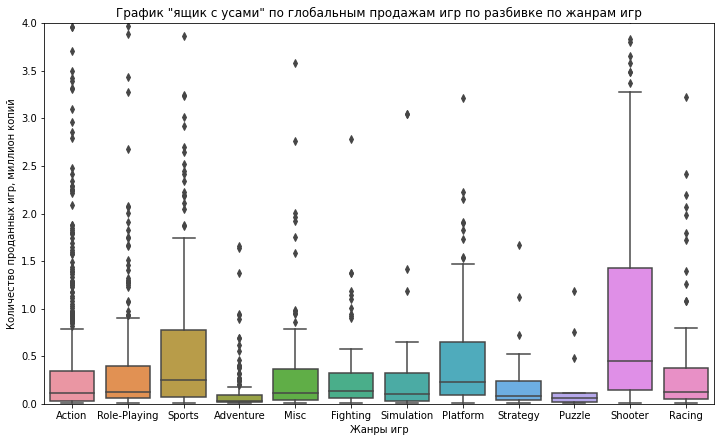

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,187.0,1.245882,2.014107,0.01,0.1400,0.450,1.4250,14.63
Sports,208.0,0.720817,1.232606,0.01,0.0700,0.250,0.7800,8.58
Platform,72.0,0.582500,0.816678,0.01,0.0875,0.225,0.6450,4.32
Fighting,79.0,0.446709,1.054493,0.01,0.0650,0.130,0.3250,7.55
Role-Playing,285.0,0.508281,1.368564,0.01,0.0600,0.120,0.4000,14.60
Racing,85.0,0.469294,0.964101,0.01,0.0500,0.120,0.3800,7.09
Misc,146.0,0.428562,1.034251,0.01,0.0400,0.115,0.3675,9.18
Action,752.0,0.426210,1.264693,0.01,0.0300,0.110,0.3400,21.05
Simulation,61.0,0.353279,0.856013,0.01,0.0300,0.100,0.3200,5.22


In [42]:
#построим "ящик с усами" для полного понимания как располагаются продаваемые игры по жанрам
plt.figure(figsize=(12, 7))
sns.boxplot(x='genre', y='all_sales', data=current_data.sort_values(by='platform'))
plt.title('График "ящик с усами" по глобальным продажам игр по разбивке по жанрам игр')
plt.xlabel('Жанры игр')
plt.ylabel('Количество проданных игр, миллион копий')
plt.ylim(0, 4)
plt.show()
median_sales_genre = current_data.groupby('genre')['all_sales']\
                               .describe().sort_values(by='50%', ascending=False)
display(median_sales_genre)

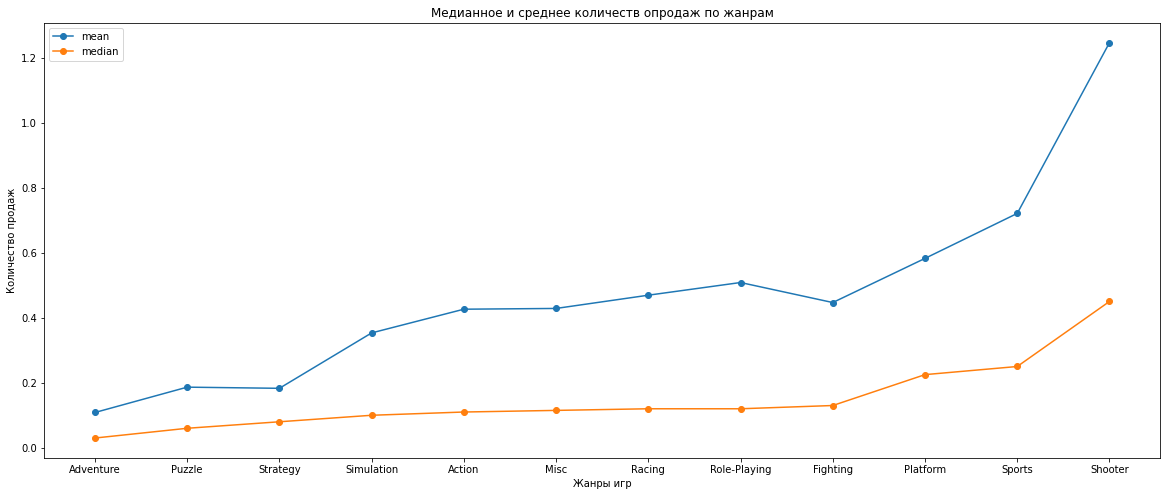

In [43]:
med_mean_sales = median_sales_genre.loc[:, ['mean', '50%']]
med_mean_sales = med_mean_sales.rename(columns={'50%': 'median'}).sort_values(by='median')
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
labels = med_mean_sales.index
#labels = ['Shooter', 'Sports', 'Platform', 'Fighting', 'Role-Playing', 'Racing'\
#          , 'Misc', 'Action','Simulation', 'Strategy', 'Puzzle', 'Adventure']
med_mean_sales.plot(style=('o-'), figsize=(20, 8))
plt.title('Медианное и среднее количеств опродаж по жанрам')
plt.xlabel('Жанры игр')
plt.ylabel('Количество продаж')
plt.xticks(x, labels)
plt.show()

По рассмотренным графикам можно сделать вывод по количеству игр по разным жанрам, в течении выбранного актуального периода больше всего было выпущено игр в жанре Action, на втором месте - Role-Playing, после второго места почти в равном количестве расположились игры жанра: Adventure, Sports, Shooter и чуть меньше игр жанра Misc. По данному параметру меньше всего игр были выпущены в жанре Puzzle.

Что касается количества проданных копий игр разных жанров, то по данному параметру все так же на первом месте находится жанр Action, однако вторую позицию занимает жанр Shooter, также после него почти в равном количестве были проданны игры таких жанров как Sports, Role_Playing и меньше игр жанра Misc. По общему количеству проданных копий игр, жанр Puzzle считается мягко сказать не прибыльным.

Исходя из этого можно сделать вывод, что самыми прибыльными жанрами являются: Shooter, Sports, Platform.

Однако по графику 'ящик с усами' можно сделать вывод по самым прибыльным жанрам игр за выбранный актуальный период, например такой жанр игр как - Shooter пользуется огромным спросом. Также достаточно хорошим спросом пользуются такие жанры как - Sports и Platform. Средним спросом пользуются игры следующих жанров: Fighting, Role-Playing, Racing, Misc. 

Что можно сказать по прибыльности игр жанра Action, то они компенсируют свою прибыль высоким выпуском игр данного жанра.

### Общий вывод по блоку

**Вывод по исследовательскому анализу данных**

Проведя исследовательский анализ данных выяснили, что в общем индустрия видео игр претерпевает упадок. 

За рассматриваемый актуальный период можно выделить такие платформы как PS4, PS3, XOne, 3DS, X360. 

Также обратили внимание на то, что на количество продаж в некоторой степени влияет мнение критиков,зависимость продаж от мнения пользователей менее заметна. 

Рассмотрели влияние жанров на продажи, самыми прибыльным жанроми являются - Shooter, Sports и Platform.

## Составим портрет пользователя по каждому региону

In [44]:
#напишем функцию по топ 5 платформ в отдельном регионе
def top_platforms_in_the_region(region, name_region):
    current_data.groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False)\
                .head(5).plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(6, 6))
    plt.title(f'Топ 5 популярных игровых платформ в  регионе {name_region}')
    plt.show()
    current_data.groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False)\
                .head(5).plot(kind='bar', grid=True)
    plt.title(f'Топ 5 популярных игровых платформ в  регионе {name_region}')
    plt.xlabel('Названия игровых платформ')
    plt.ylabel('Количество проданных копий игр')
    plt.show()

#напишем функцию по топ 5 жанров в отдельном регионе    
def top_genre_in_the_region(region, name_region):
    current_data.groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False)\
                .head(5).plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(6, 6))
    plt.title(f'Топ 5 популярных жанров в регионе {name_region}')
    plt.show()
    current_data.groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False)\
                .head(5).plot(kind='bar', grid=True)
    plt.title(f'Топ 5 популярных жанров в регионе {name_region}')
    plt.xlabel('Названия жанров игр')
    plt.ylabel('Количество проданных копий игр')
    plt.show()

#напишем функцию для оценки продажи игр в отдельном регионе в зависимости от рейтинга ESRB    
def influence_of_age_rating_in_the_region(region, name_region):
    current_data.groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False)\
                .plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(6, 6))
    plt.title(f'Количество проданных копий игр в регионе {name_region} в зависимости от возрастного рейтинга игр')
    plt.show()
    current_data.groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False)\
                .plot(kind='bar', grid=True)
    plt.title(f'Количество проданных копий игр в регионе {name_region} в зависимости от возрастного рейтинга игр')
    plt.xlabel('Возрастной рейтинг компьютерных игр')
    plt.ylabel('Количество проданных копий игр')
    plt.show()
    display(current_data.groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False))

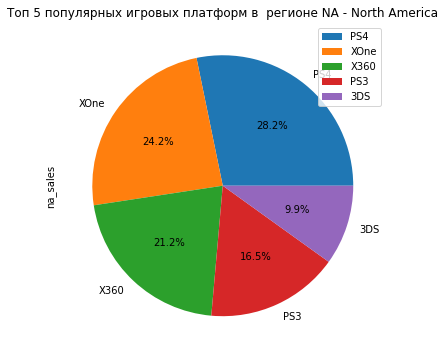

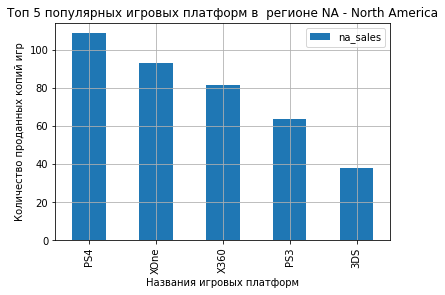

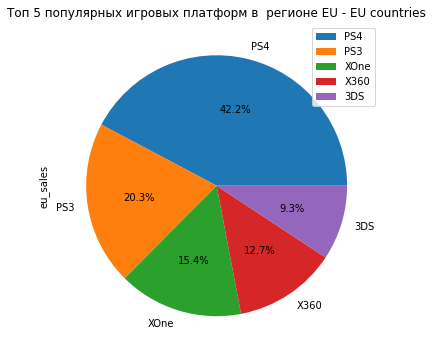

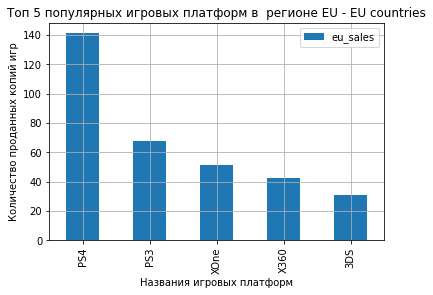

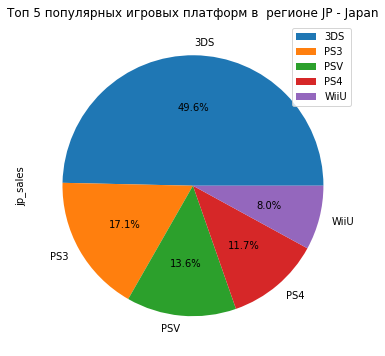

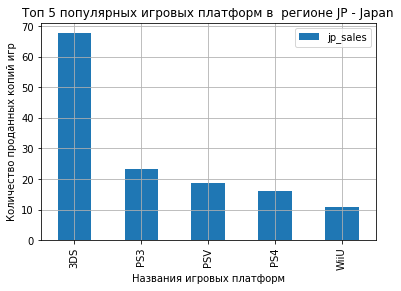

In [45]:
#определим топ 5 игровых платформ в разных регионах
#рассмотрим топ игровых платформ для региона NA
top_platforms_in_the_region('na_sales', 'NA - North America')

#рассмотрим топ игровых платформ для региона EU
top_platforms_in_the_region('eu_sales', 'EU - EU countries')

#рассмотрим топ игровых платформ для региона JP
top_platforms_in_the_region('jp_sales', 'JP - Japan')

Как показывают графики, спрос игр на различные платформы зависит от популярности платформы в конкретном регионе.

Топ пять платформ в регионе North America являются такие платформы как: PS4, XOne, X360, PS3, 3DS.

Топ пять платформ в регионе EU countries являются такие платформы как: PS4, PS3, XOne, X360,  3DS.

Топ пять платформ в регионе Japan являются такие платформы как: 3DS, PS3, PSV, PS4, WiiU.

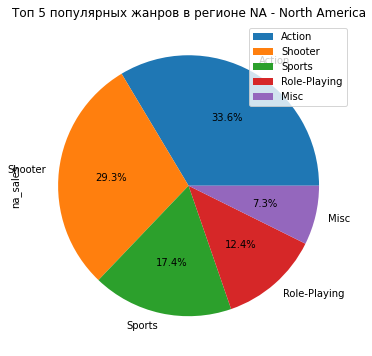

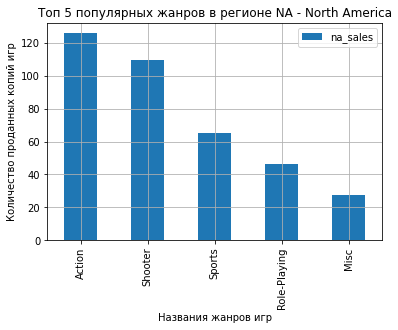

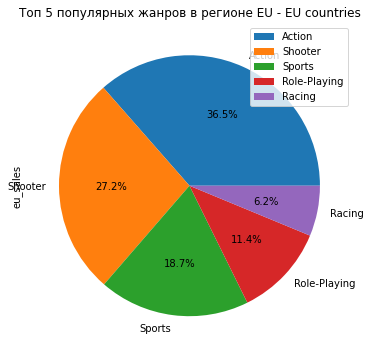

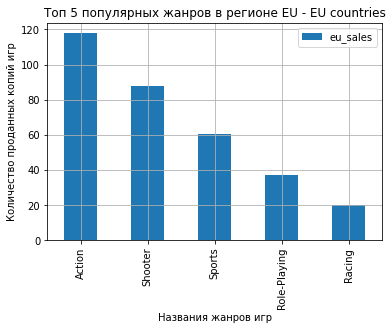

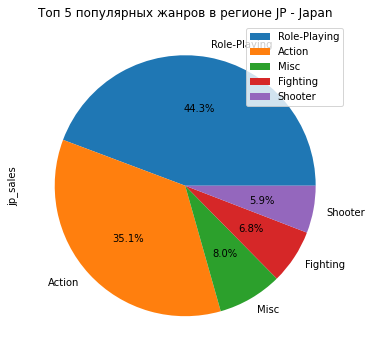

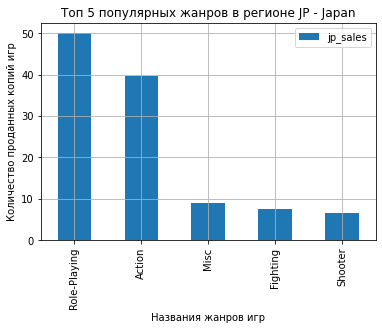

In [46]:
#определим топ 5 самых популярные жанров игр в разных регионах:
#рассмотрим популярные жанры игр для региона NA
top_genre_in_the_region('na_sales', 'NA - North America')

#рассмотрим популярные жанры игр для региона EU
top_genre_in_the_region('eu_sales', 'EU - EU countries')

#рассмотрим популярные жанры игр для региона JPMi
top_genre_in_the_region('jp_sales', 'JP - Japan')

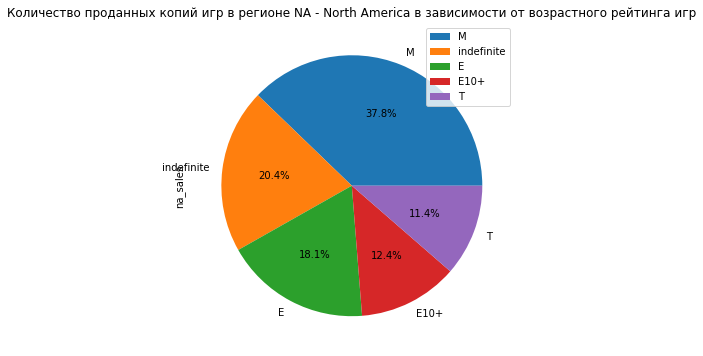

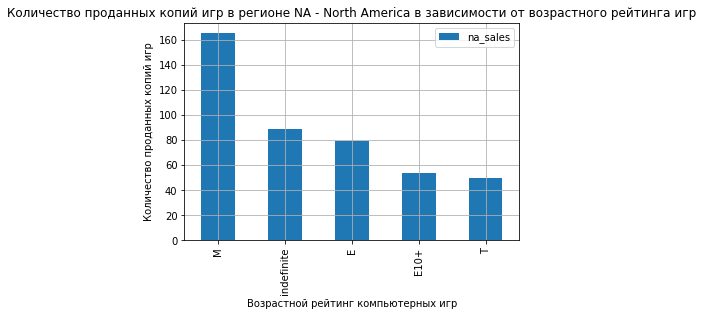

,na_sales
rating,
M,165.21
indefinite,89.18
E,78.94
E10+,54.02
T,49.79


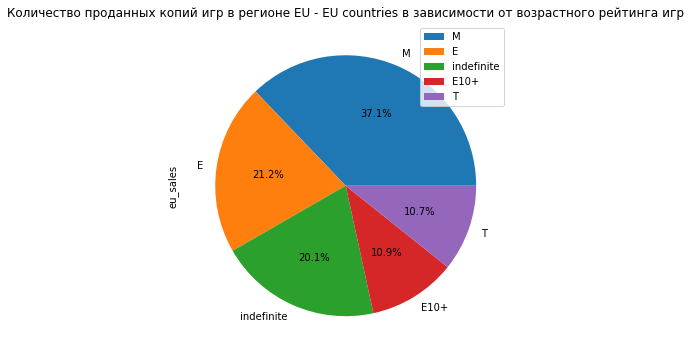

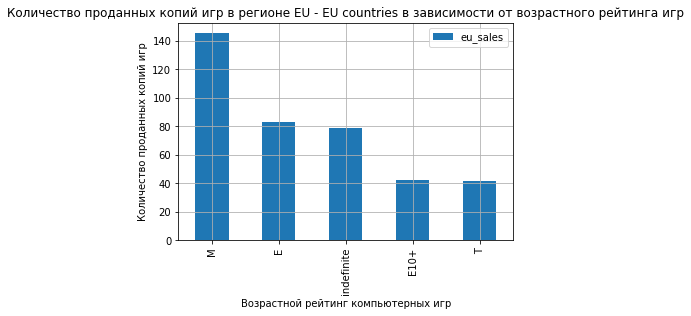

,eu_sales
rating,
M,145.32
E,82.80
indefinite,78.61
E10+,42.53
T,41.95


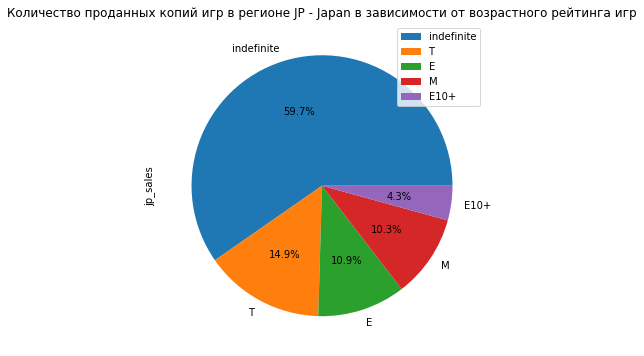

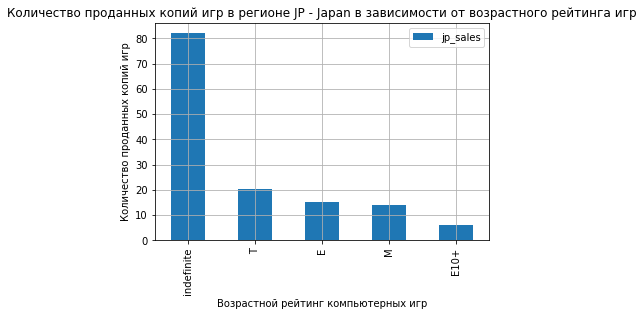

,jp_sales
rating,
indefinite,82.05
T,20.44
E,15.00
M,14.11
E10+,5.89


In [47]:
#определим влияет ли возрастной рейтинг игр на продажи в отдельном регионе
#рассмотрим регион NA
influence_of_age_rating_in_the_region('na_sales', 'NA - North America')

#рассмотрим регион EU
influence_of_age_rating_in_the_region('eu_sales', 'EU - EU countries')

#рассмотрим регион JP
influence_of_age_rating_in_the_region('jp_sales', 'JP - Japan')

- Зрелые 17+ (М) - Игры с таким рейтингом содержат контент, подходящий для детей от 17 лет и старше.

- Все (E) - Игры с таким рейтингом содержат контент, подходящий для всех возрастов.

- Подросток (Т) - Игры с таким рейтингом содержат контент, подходящий для детей от 13 лет и старше.

- Все 10+ (E10+) - Игры с таким рейтингом содержат контент, подходящий для детей старше 10 лет.

- Раннее детство (ЕС) - Этот рейтинг обозначает контент, предназначенный для дошкольной аудитории.

- indefinite выделили как неопределенный.


Для регионов North America и EU countries спрос на игры по возрастному рейтингу рпсположенны почти пропрционально, в таком порядке: М - игры для детей старше 17 лет, E - игры для всех возрастов, T - игры для детей от 13 лет и старше, E10+ - игры для детей старше 10 лет. 

В регионе Japan по всей видимости рейтинг ассоциации ESRB по большей части не учитывается, так можно видеть на графике и круговой диаграмме, что почти у 60% проданных игр в данном регионе не учтен рейтинг.

### Общий вывод по блоку

**Вывод**

Исходя из проведенного анализа можно сделать портрет пользователя по каждому из рассмотренных регионов.

Пользователи региона North America предпочитают:
- игровые платформы как PS4, XOne, X360, PS3, 3DS.; 

- жанры игр как: Action, Shooter, Sports, Role-Playing, Misc. 

Самый большой спрос по играм с рейтингом: М - игры для детей старше 17 лет, на втором месте рейтинг E - игры для всех возрастов, и почти с одинаковым количеством продаж 
рейтинги T - игры для детей от 13 лет и старше и E10+ - игры для детей старше 10 лет.
_______________________________________________________________________________________________________________________________
Пользователи региона EU countries предпочитают:
- игровые платформы как: PS4, PS3, XOne, X360, 3DS; 

- жанры игр как: Action, Shooter, Sports, Role-Playing, Racing. 

Самый большой спрос по играм с рейтингом: М - игры для детей старше 17 лет, на втором месте рейтинг E - игры для всех возрастов, и небольшой разницей в количестве продаж рейтинги T - игры для детей от 13 лет и старше и E10+ - игры для детей старше 10 лет.
_______________________________________________________________________________________________________________________________
Пользователи региона Japan предпочитают:
- игровые платформы как 3DS, PS3, PSV, PS4, WiiU. 
- большой спрос имеется на жанры игр как: около 80% - Role-Playing и Action, остальную часть занимают Misc, Fighting, Shooter. 

В регионе Japan по всей видимости рейтинг ассоциации ESRB по большей части не учитывается.

## Проверим гипотезы

### Первая гипотеза

Проверим гипотезу:
- **Средние пользовательские рейтинги платформ XboxOne и PC одинаковые.**

H0: µ1 = µ2, среднее значение пользовательского рейтинга по платформам XboxOne и PC - одинаковые.

H1: µ1 ≠ µ2, среднее значение пользовательского рейтинга по платформам XboxOne и PC - разные.

In [48]:
#выделим интересующие выборки
rating_xboxone = current_data.query('platform == "XOne"')['user_score'].dropna()
rating_pc = current_data.query('platform == "PC"')['user_score'].dropna()
print(rating_xboxone.describe())
print(np.var(rating_xboxone))
print(rating_pc.describe())
print(np.var(rating_pc))

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
1.8965188383045526
count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64
3.016306347554631


In [49]:
#определим отношение групп данных
#если отношение меньше 4, то мы можем считать, что данные группы данных имеют равную дисперсию
print(np.var(rating_pc), '/', np.var(rating_xboxone), '=',  np.var(rating_pc) / np.var(rating_xboxone))

3.016306347554631 / 1.8965188383045526 = 1.590443652144866


In [50]:
#применим гипотезу о равенстве средних двух генеральных совокупностей
alpha_platform = 0.05  #объем выборки достаточно большой
value_platform = st.ttest_ind(rating_pc\
                              , rating_xboxone\
                              , equal_var=False)
print('p-значение:', value_platform.pvalue)
if value_platform.pvalue < alpha_platform:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### Вторая гипотеза

Проверим гипотезу:
- **Средний пользовательский рейтинг жанров Action и Sports разные.**

H0: µ1 = µ2, среднее значение пользовательского рейтинга игр жанра Action и Sports - одинаковые.

H1: µ1 ≠ µ2, среднее значение пользовательского рейтинга игр жанра Action и Sports - разные.

In [51]:
rating_action = current_data.query('genre == "Action"')['user_score'].dropna()
rating_sports = current_data.query('genre == "Sports"')['user_score'].dropna()
print(rating_action.describe())
print(np.var(rating_action))
print(rating_sports.describe())
print(np.var(rating_sports))

count    388.000000
mean       6.842784
std        1.327847
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
1.7586334892124562
count    159.000000
mean       5.249686
std        1.783038
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64
3.159229460859934


In [52]:
#определим отношение групп данных
#если отношение меньше 4, то мы можем считать, что данные группы данных имеют равную дисперсию
print(np.var(rating_sports), '/', np.var(rating_action), '=',  np.var(rating_sports) / np.var(rating_action))

3.159229460859934 / 1.7586334892124562 = 1.7964115207852016


In [53]:
#применим гипотезу о равенстве средних двух генеральных совокупностей
alpha_genre = 0.05  #объем выборки достаточно большой
value_platform = st.ttest_ind(rating_sports\
                              , rating_action\
                              , equal_var=False)
print('p-значение:', value_platform.pvalue)
if value_platform.pvalue < alpha_genre:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.419141451747253e-20
Отвергаем нулевую гипотезу


### Общий вывод по блоку

**Вывод**

При сравнении среднего пользовательского рейтинга двух платформам XboxOne и PC, не удалось отвергнуть гипотезу, что средний рейтинг одинаковый.

При сравнении среднего пользовательского рейтинга двух жанров игр Action и Sports, отвергли гипотезу, что средний рейтинг одинаковый. То есть можно утверждать, что рейтинг данных жанров разный.

## Общий вывод по проведенным исследованиям

При ознакомлении с данными были выявлены недочеты в оформлении названии столбцов, также обнаружили пропуски. Привели данные к стандартам, а также по возможности заполнили пропуски. 

При исследовании анализа данных за все годы игровой индустрии выделили три периода развития:
- первый период с 1980 по 1993, период становления и формирования сферы видеоигр;
- второй период с 1994 по 2009, переиод активного развития видеоигр и достижения пика по выпуску игр;
- третий период с 2010 период заметного снижения выпуска видеоигр.

За все время существования видеоигр можно выделить платформы с самым большим спросом по количеству проданных игр, это такие платформы как: PS2, X360, PS3, Wii, DS, PS. Продолжительность 'жизни' игровой платформы составляет около 10 лет.

За актуальный период по количеству проданных игр можно выделить платформы: X360, PS3, XOne, PS4.

За все время больше всего было продано игр по жанрам: Action, Shooter, Sports, Role_Playing и Misc.

Можно охарактеризовать особенности пользователя для региона North America:
- игровые платформы как PS4, XOne, X360, PS3, 3DS; 

- жанры игр как: Action, Shooter, Sports, Role-Playing, Misc.
_______________________________________________________________________________________________________________________________
Можно охарактеризовать особенности пользователя для региона EU countries:
- игровые платформы как: PS4, PS3, XOne, X360, 3DS; 

- жанры игр как: Action, Shooter, Sports, Role-Playing, Racing. 
_______________________________________________________________________________________________________________________________
Можно охарактеризовать особенности пользователя для региона Japan:
- игровые платформы как 3DS, PS3, PSV, PS4, WiiU. 
- большой спрос имеется на жанры игр как: около 80% - Role-Playing и Action, остальную часть занимают Misc, Fighting, Shooter.

**В таких регионах как North America и EU countries для прогнозирования спроса на 2017 год следует особое внимание уделить на игры жанра Shooter, Sports и Platform, на возрастной рейтинг М - для детей старше 17 лет и Е- для всех возрастов, на такие 'молодые' и перспективные платформы как PS4 и XOne.**

**Для максимального спроса в регионе Japan следует сделать акцент на  такие жанры как Role-Playing и Action, возрастной рейтинг E - игры для всех возрастов, для компенсации разницы в различии оценок возрастного рейтинга для данного региона. Также следует уделить вниманию 'молодой' платформе 3DS которой отдают большее предпочтение нежели к другим платформам.**